In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)
torch.manual_seed(123)

In [3]:
from torchvision import datasets

In [8]:
data_path = "../../myData/p1ch7/cifar"
# cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
# 下载速度太慢了，这里就不运行了，直接在浏览器里下载了

In [9]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)

Files already downloaded and verified


In [10]:
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified


In [11]:
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

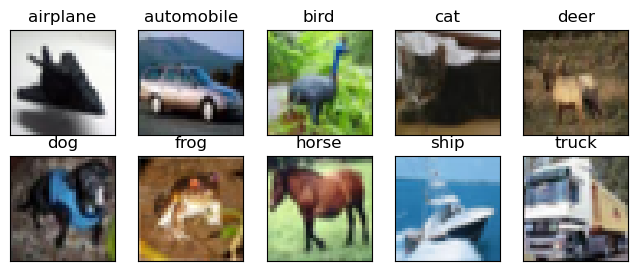

In [12]:
fig = plt.figure(figsize=(8, 3))
num_classes = 10

for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10 if label == i)
    plt.imshow(img)

plt.show()

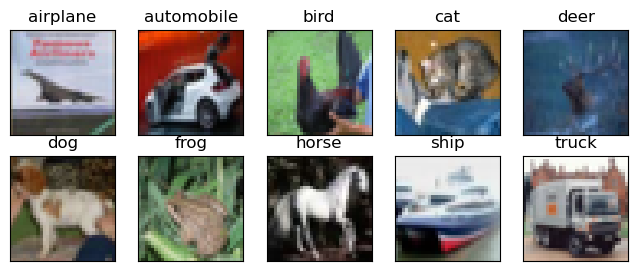

In [13]:
fig = plt.figure(figsize=(8, 3))
num_classes = 10

for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    img = next(img for img, label in cifar10_val if label == i)
    plt.imshow(img)

plt.show()

In [14]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [15]:
len(cifar10), len(cifar10_val)

(50000, 10000)

In [17]:
img, label = cifar10[66]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 4, 'deer')

In [ ]:
# img.shape, img.dtype # AttributeError: 'Image' object has no attribute 'shape'

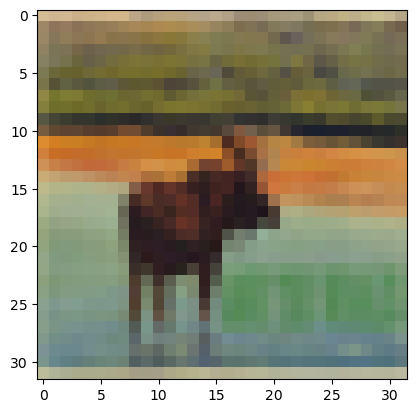

In [18]:
plt.imshow(img)

In [22]:
from torchvision import transforms

dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [23]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [66]:
tensor_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False, transform=transforms.ToTensor()
)
tensor_cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False, transform=transforms.ToTensor()
)

In [30]:
type(tensor_cifar10[66])

tuple

In [33]:
img_t, _ = tensor_cifar10[99]
img_t.min(), img_t.max(), img_t.shape

(tensor(0.), tensor(1.), torch.Size([3, 32, 32]))

hint：所以plt.imshow()接收的是(w, h, c)的形式的数据，并且array和tensor都可以

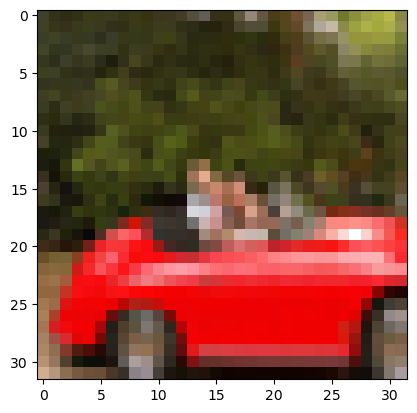

In [32]:
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

**所以torch.stack()是必定会增加一个维度的**

In [53]:
a = torch.tensor(list(range(0, 10)))
b = torch.tensor(list(range(10, 20)))
c = torch.tensor(list(range(20, 30)))
d = torch.tensor(list(range(30, 40)))
torch.stack([a, b], dim=0).shape, torch.stack([a, b], dim=1).shape

(torch.Size([2, 10]), torch.Size([10, 2]))

In [55]:
e = torch.stack([a, b], dim=0)
f = torch.stack([c, d], dim=0)
e, f

(tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]),
 tensor([[20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]]))

In [68]:
g = torch.stack([e, f, f], dim=0)
g, g.shape

(tensor([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
          [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]],
 
         [[20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
          [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]],
 
         [[20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
          [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]]]),
 torch.Size([3, 2, 10]))

torch.stack()可以接收的dim范围为0~n，并且返回的tensor一定比源数据高一维，假如有x个张量进行堆叠，每个张量的shape是(n0, n1, n2, ...,n)，则最后返回的shape为(n0, n1,...,n(x-1), x, n(x+1)...,n)

In [69]:
h = torch.stack([g, g], dim=3)
h, h.shape

(tensor([[[[ 0,  0],
           [ 1,  1],
           [ 2,  2],
           [ 3,  3],
           [ 4,  4],
           [ 5,  5],
           [ 6,  6],
           [ 7,  7],
           [ 8,  8],
           [ 9,  9]],
 
          [[10, 10],
           [11, 11],
           [12, 12],
           [13, 13],
           [14, 14],
           [15, 15],
           [16, 16],
           [17, 17],
           [18, 18],
           [19, 19]]],
 
 
         [[[20, 20],
           [21, 21],
           [22, 22],
           [23, 23],
           [24, 24],
           [25, 25],
           [26, 26],
           [27, 27],
           [28, 28],
           [29, 29]],
 
          [[30, 30],
           [31, 31],
           [32, 32],
           [33, 33],
           [34, 34],
           [35, 35],
           [36, 36],
           [37, 37],
           [38, 38],
           [39, 39]]],
 
 
         [[[20, 20],
           [21, 21],
           [22, 22],
           [23, 23],
           [24, 24],
           [25, 25],
           [26, 

所以这里是把所有图片按照像素每一个通道值进行堆叠，最后的shape应该是(3,32,32,50000)

In [73]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [74]:
img_for_mean = imgs.view(3, -1)
img_for_mean.shape

torch.Size([3, 51200000])

In [75]:
r_m, g_m, b_m = img_for_mean.mean(dim=1)
r_m, g_m, b_m

(tensor(0.4914), tensor(0.4822), tensor(0.4465))

In [76]:
r_s, g_s, b_s = img_for_mean.std(dim=1)
r_s, g_s, b_s

(tensor(0.2470), tensor(0.2435), tensor(0.2616))

In [77]:
transforms.Normalize((r_m, g_m, b_m), (r_s, g_s, b_s))

Normalize(mean=(tensor(0.4914), tensor(0.4822), tensor(0.4465)), std=(tensor(0.2470), tensor(0.2435), tensor(0.2616)))

In [78]:
transformed_cifar10 = datasets.CIFAR10(
    data_path,
    train=True,
    download=False,
    transform=transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((r_m, g_m, b_m), (r_s, g_s, b_s))]
    ),
)

需要注意的是，虽然在归一化训练数据时我们用的是训练集的均值和标准差，但并不意味着我们要用测试集的均值和标准差来归一化验证集数据。因为我们预测测试集的数据时，本就不应该知道测试集的均值和标准差，所以我们用的是训练集的均值和标准差来归一化验证集数据。

In [79]:
transformed_cifar10_val = datasets.CIFAR10(
    data_path,
    train=False,
    download=False,
    transform=transforms.Compose(
        [transforms.ToTensor(), transforms.Normalize((r_m, g_m, b_m), (r_s, g_s, b_s))]
    ),
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


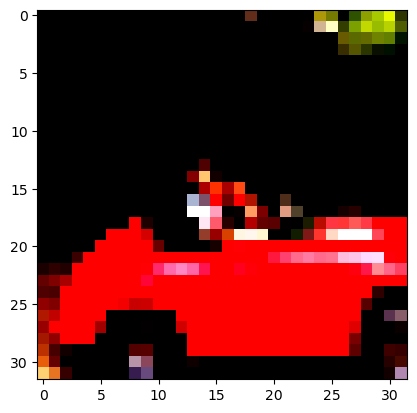

In [80]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()